In [1]:
from scipy.special import expi

In [2]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt

In [4]:
co = 5e-6
cw = 3e-6
cr = 3e-6
Sw = 0.25
So = 0.75

In [5]:
ct = co*So+cw*Sw+cr

In [6]:
ct

7.500000000000001e-06

In [10]:
class res: pass
class fluid: pass
class well: pass

In [20]:
res.k = 80
res.phi = 0.18
res.h = 50
res.ct = ct
res.Pi = 5000

In [21]:
fluid.muo = 3
fluid.Bo = 1.2

In [28]:
well.rw = 0.25
well.qo = -300

In [23]:
def transient(R,F,W,r:np.ndarray,t:float):

  cons = 70.6*(W.qo*F.muo)/(R.k*R.h)

  eiterm = -39.5*(R.phi*F.muo*R.ct*r**2)/(R.k*t)

  return R.Pi-cons*expi(eiterm)

In [34]:
radius = np.logspace(-0.6020599913279624,3)

In [35]:
time = 1

In [40]:
P1 = transient(res,fluid,well,radius,1)
P10 = transient(res,fluid,well,radius,10)
P100 = transient(res,fluid,well,radius,100)

Text(0, 0.5, 'pressure, psi')

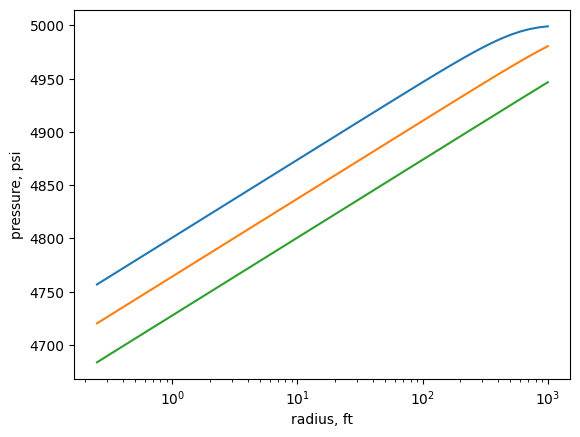

In [43]:
plt.semilogx(radius,P1)
plt.semilogx(radius,P10)
plt.semilogx(radius,P100)
plt.xlabel("radius, ft")
plt.ylabel("pressure, psi")